                                МИНИСТЕРСТВО ОБРАЗОВАНИЯ РЕСПУБЛИКИ БЕЛАРУСЬ
                                   БЕЛОРУССКИЙ ГОСУДАРСТВЕННЫЙ УНИВЕРСИТЕТ
                                      Факультет прикладной математики и информатики
                                            Кафедра вычслительной математики
    
<h2 style="margin:100px 0px 0px 0px;">Жумигина Евгения</h2>
<h2>Итерационные методы решения СЛАУ</h2>

<h5 style="max-width:350px; owerflow: hidden;">
    Отчет по лабораторной работе №3
    ( “Методы вычислений”)
    студентки 2 курса 12 группы
</h5>

<div style="text-align: right; margin:120px,0,120px,0;"> 
  <br>Преподаватель
  <br>Бондарь И. В.
</div>

                                                        Минск 2019

Скачать указанные в варианте матрицы из коллекции [1] (см. конец документа) в формате MatrixMarket и для каждой матрицы выполнить следующие действия.

2. Загрузить матрицу в память в виде разреженной матрицы $A$ (см. `scipy.sparse`), используя функцию `scipy.io.mmread`
3. Изобразить структуру разреженности матрицы (расположение ненулевых элементов) с помощью функции `matplotlib.pyplot.spy` (используйте опцию `markersize=1`)
4. Указать количество и процентное соотношение ненулевых элементов.
4. Сгенерировать вектор правой части $b$ такой, что $Ax^*=b$, где точное решение $x^*=(1,1,\ldots,1)^T$.
5. Решите систему $Ax=b$ методом GMRES (`scipy.sparse.linalg.gmres`), вычислите норму невязки между точным и приближенным решением.
6. Используя параметр `callback` для функции `scipy.sparse.linalg.gmres`, получите список норм невязок $\|r(x^k)\|$, где $r(x) = b - Ax$ и постройте по нему логарифмическую диаграмму сходимости метода.

Какая из рассмотренных СЛАУ, на ваш взгляд, является более сложной для численного решения? Почему?

Count of nonzero elements:  32702
Count of all elements:  1397124
Percentage:  2.340665538635082
Residual norm:  3.7319963615557348


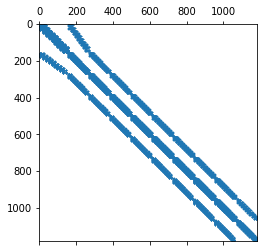

In [9]:
import numpy as np
import scipy.io as sio
import matplotlib.pylab as plt
from matplotlib.pyplot import spy
import scipy.linalg as sla
import scipy.sparse as sps
import scipy.sparse.linalg as spla
from scipy import special
import heapq

A = sio.mmread(r'/Users/macpro/Downloads/cavity07/cavity07.mtx') 
plt.spy(A, marker='.', markersize=1)
size=A.shape[0]
count=A.count_nonzero()
print("Count of nonzero elements: ", count)
count_all=size*size
print("Count of all elements: ", count_all)
print("Percentage: ", count/count_all*100)
x = np.empty((size, 1), dtype=int)
x[:] = 1
B=[]
B=A*x
x1= spla.gmres(A, B)[0]

nev=x-x1

nev_max=nev.max()
print("Residual norm: ", nev_max)

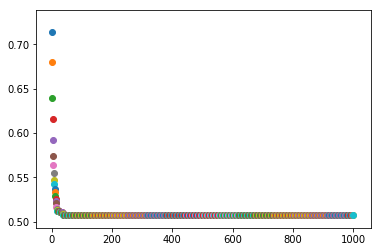

In [13]:
nev1= np.ones(1000)
num=0
def cb(xk):
    global num
    global nev1
    plt.scatter(num, xk)
    nev1[num] = xk
    num = num + 1
spla.gmres(A,B, callback=cb, maxiter=1000)
plt.show()

Count of nonzero elements:  333029
Count of all elements:  2470288804
Percentage:  0.013481379159422364
Residual norm:  1.0126869127292406


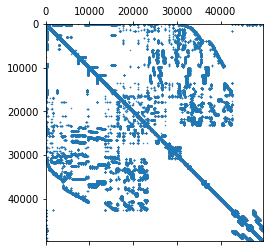

In [4]:
import numpy as np
import scipy.io as sio
import matplotlib.pylab as plt
from matplotlib.pyplot import spy
import scipy.linalg as sla
import scipy.sparse as sps
import scipy.sparse.linalg as spla
from scipy import special
import heapq
A = sio.mmread(r'/Users/macpro/Downloads/ckt11752_dc_1/ckt11752_dc_1.mtx') 

plt.spy(A, marker='.', markersize=1)            
size=A.shape[0]
#print(size)
count=A.count_nonzero()
print("Count of nonzero elements: ", count)
count_all=size*size
print("Count of all elements: ", count_all)
print("Percentage: ", count/count_all*100)
x = np.empty((size, 1), dtype=int)
x[:] = 1
B=[]
B=A*x
x1= spla.gmres(A, B, maxiter=1000)[0]
#print(x1)
nev=x-x1

nev_max=nev.max()
print("Residual norm: ", nev_max)

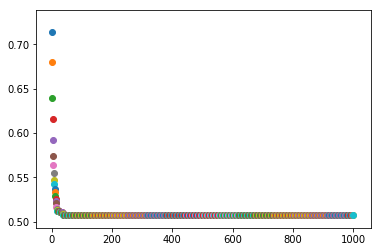

In [12]:
nev1= np.ones(1000)
num=0
def cb(xk):
    global num
    global nev1
    plt.scatter(num, xk)
    nev1[num] = xk
    num = num + 1
spla.gmres(A,B, callback=cb, maxiter=1000)
plt.show()

Я думаю, что сложнее для вычислений можно назвать вторую матрицу, так как количество ненулевых элементов намного превышает количество нулевых.

 Матрицы $A_n$ вида $A_5=\left(
\begin{array}{ccccc}
 1 & 0 & \frac{1}{2} & 0 & 0 \\
 0 & 2 & 0 & 1 & 0 \\
 \frac{1}{2} & 0 & 3 & 0 & \frac{3}{2} \\
 0 & 1 & 0 & 4 & 0 \\
 0 & 0 & \frac{3}{2} & 0 & 5 \\
\end{array}
\right),
\quad 
A_8=\left(
\begin{array}{cccccccc}
 1 & 0 & \frac{1}{2} & 0 & 0 & 0 & 0 & 0 \\
 0 & 2 & 0 & 1 & 0 & 0 & 0 & 0 \\
 \frac{1}{2} & 0 & 3 & 0 & \frac{3}{2} & 0 & 0 & 0 \\
 0 & 1 & 0 & 4 & 0 & 2 & 0 & 0 \\
 0 & 0 & \frac{3}{2} & 0 & 5 & 0 & \frac{5}{2} & 0 \\
 0 & 0 & 0 & 2 & 0 & 6 & 0 & 3 \\
 0 & 0 & 0 & 0 & \frac{5}{2} & 0 & 7 & 0 \\
 0 & 0 & 0 & 0 & 0 & 3 & 0 & 8 \\
\end{array}
\right)$  и т. д.

Checking on matrix with size 5: 
Vector B:  [ 80.  129.  380.5 404.  537. ]
Expected x:  [41 16 78 97 84]
x using Gauss-Seidel method:  [25.99220003 79.00000016 27.00381927 42.99999996 59.99532002]


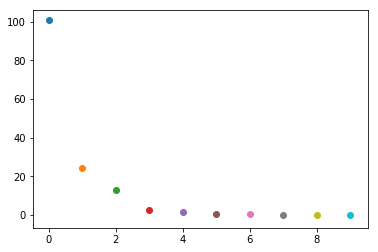

Checking on matrix with sizes 100 and 1000
x using Gauss-Seidel method:  [1.60000542e+01 4.00006356e+00 6.59998919e+01 1.39998815e+01
 9.30001973e+01 8.50001911e+01 3.09996724e+01 6.99997181e+01
 8.00050967e+00 5.40003905e+01 1.69992440e+01 9.19994850e+01
 8.60010805e+01 5.90006518e+01 9.09985020e+01 3.89992042e+01
 2.20020243e+01 8.90009401e+01 8.99732473e+00 2.59989243e+01
 1.20034666e+01 8.00119222e+00 9.89955868e+01 4.19987224e+01
 5.90055284e+01 2.00013187e+01 7.99931765e+01 2.39986986e+01
 6.70083067e+01 1.30012114e+01 1.59900172e+01 4.19989654e+01
 8.90118524e+01 6.00007579e+01 4.79860886e+01 9.89996304e+01
 6.20161503e+01 8.99998605e+01 9.81445964e-01 2.00077592e+00
 6.70211020e+01 6.09984574e+01 5.39762325e+01 2.20024386e+01
 3.60265185e+01 1.49965417e+01 2.99706826e+01 3.40045917e+01
 9.90321220e+01 1.99417589e+00 4.29651139e+01 3.40071361e+01
 2.20375603e+01 6.29914958e+01 3.89599070e+01 9.70099008e+01
 4.90424319e+01 9.09887046e+01 1.89554751e+01 6.70126553e+01
 6.00463216e

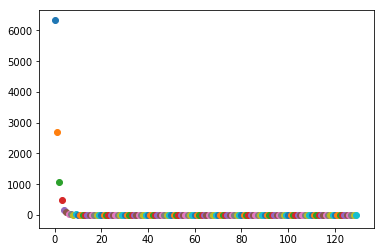

In [ ]:
import numpy as np
from numpy import linalg as lg
import time
import matplotlib.pyplot as spy

def gauss_zeidel(eps,n):
    number=0
    x0=np.ones(n)
    x1=np.zeros(n)
    b = np.ones(n)
    b1 = np.ones(n)
    x = np.random.randint(0, 100, n)
    d1 = [ x/2 for x in range(1,n-1)]
    d2 = [ x for x in range(1,n+1)]
    d3 = [ x/2 for x in range(1,n-1)]
    for i in range(0, 2):
        b[i]=d1[i]*x[i+2]+ d2[i]*x[i]
    
    for i in range(0,n-4):
        b[i+2] = d1[i+2]*x[i+4] + d2[i+2]*x[i+2] + d3[i]*x[i]
        
    for i in range(n-2, n):
        b[i]=d3[i-2]*x[i-2] + d2[i]*x[i]
        
    matrix=(d1,d2,d3,b,x)
    
    
    while(True):
        for i in range(0, 2):
            x1[i]=(matrix[3][i]-(matrix[0][i]*x0[i+2]))/matrix[1][i]
            b1[i]=matrix[1][i]*x1[i]+matrix[0][i]*x1[i+2]  
       
        for i in range(n-2, n):
            x1[i]=(matrix[3][i]-(matrix[2][i-2]*x1[i-2]))/matrix[1][i]
            b1[i]=matrix[2][i-2]*x1[i-2]+matrix[1][i]*x1[i]
       
        for i in range(0, n-4):
            x1[i+2]=((matrix[3][i+2]-(matrix[0][i+2]*x0[i+4]))-(matrix[2][i]*x1[i]))/matrix[1][i+2]
            b1[i+2] = matrix[1][i+2]*x1[i+2] + matrix[0][i+2]*x1[i+4] + matrix[2][i]*x1[i]
            
        b1=b1-matrix[3]
        spy.scatter(number, lg.norm(b1))
        if(lg.norm(b1)<eps):
            break
        x0=list(x1)
        number=number + 1
    print("x using Gauss-Seidel method: " , x1)
    return matrix

print("Checking on matrix with size 5: ")
eps=0.01 
n=5
#matrix=generate(n)
print("Vector B: ", matrix[3])
print("Expected x: ", matrix[4])
gauss_zeidel(eps, n)
spy.show()

print("Checking on matrix with sizes 100 and 1000")
n1=100 
#matrix1=generate(n1)
gauss_zeidel(eps,n1)
spy.show()
n2=1000
#matrix2=generate(n2)
gauss_zeidel(eps,n2)
spy.show()

def count_time(eps):
    for i in range(2,12):
        stepen=int(i/2)
        n=pow(10,stepen)
        start_time= round(time.time()) * 1000
        gauss_zeidel(eps,n)
        end_time= round(time.time()) * 1000
        t=end_time-start_time
        spy.scatter(n, t)
    spy.show()

In [ ]:
print("For time-size diagram: ")
eps=0.00000001
count_time(eps)

Checking on matrix with size 5: 
Vector B:  [112. 253. 405. 424. 596.]
Expected x:  [75 84 74 85 97]
x using Gauss-Seidel method:  [74.99111583 84.00000031 74.00215464 84.99999992 96.9946695 ]


<Figure size 640x480 with 1 Axes>

Checking on matrix with sizes 100 and 1000
x using Gauss-Seidel method:  [8.90000901e+01 8.30002064e+01 9.99831191e-01 1.89996025e+01
 7.10002880e+01 4.20006659e+01 5.89995554e+01 3.19989728e+01
 1.80006401e+01 1.50014973e+01 2.29991250e+01 3.09979075e+01
 1.20011484e+01 4.20028288e+01 6.79985425e+01 3.39962781e+01
 2.00179779e+00 1.10047861e+01 9.97837291e-01 4.19939656e+01
 9.00254406e+00 8.70074775e+01 3.39970679e+01 7.29908764e+01
 4.00033157e+01 4.70109777e+01 8.99631707e+00 4.79869589e+01
 3.60040213e+01 2.20153111e+01 3.19956818e+01 9.49822194e+01
 1.30045615e+01 7.40204377e+01 9.79952599e+01 8.19767346e+01
 4.60048442e+01 1.70262417e+01 4.49951342e+01 1.79706607e+01
 8.20047992e+01 8.10325262e+01 7.99953588e+01 2.39642346e+01
 1.80043912e+01 3.03901572e+00 8.79959481e+01 9.29577678e+01
 2.90036283e+01 6.80453668e+01 8.29968714e+01 5.39516311e+01
 1.60025633e+01 1.30511869e+01 3.99805473e+00 6.39462314e+01
 5.00128934e+00 2.60560624e+01 8.49993884e+01 5.49419811e+01
 4.49999291e

<Figure size 640x480 with 1 Axes>

x using Gauss-Seidel method:  [ 8.80000000e+01  2.40000000e+01  4.10000000e+01  5.70000000e+01
  9.70000000e+01  6.30000000e+01  8.40000000e+01  2.40000000e+01
  9.00000000e+00  2.10000000e+01  4.00000000e+00  7.00000001e+00
  4.00000000e+01  9.50000000e+01  2.40000000e+01  7.70000000e+01
  3.20000000e+01  5.00000000e+01  3.40000000e+01  6.00000003e+00
  2.90000000e+01  3.10000000e+01  9.40000000e+01  8.60000000e+01
  2.70000000e+01  1.49999999e+01 -4.41085540e-08  6.30000001e+01
  1.20000001e+01  9.49999999e+01  9.79999999e+01  8.00000001e+01
  1.60000001e+01  6.29999999e+01  7.19999999e+01  3.40000002e+01
  1.00000013e+00  6.99999980e+00  2.09999998e+01  4.60000002e+01
  6.10000002e+01  4.19999997e+01  7.89999998e+01  6.00000035e+00
  1.40000003e+01  7.99999996e+01  2.99999997e+01  2.70000005e+01
  7.20000004e+01  9.39999994e+01  3.89999996e+01  4.70000007e+01
  2.20000005e+01  5.49999992e+01  9.49999994e+01  5.70000009e+01
  9.30000007e+01  4.79999989e+01  4.79999992e+01  2.70000012

<Figure size 640x480 with 1 Axes>

For time-size diagram: 
x using Gauss-Seidel method:  [64.         10.00000001 46.         59.99999999 37.         77.00000001
 28.         96.99999999 46.         94.        ]
x using Gauss-Seidel method:  [22.         75.00000001 85.          0.99999999 12.         23.00000001
 64.         91.99999999 62.         25.        ]
x using Gauss-Seidel method:  [1.30000000e+01 1.20000000e+01 5.10000000e+01 9.80000000e+01
 4.00000000e+01 9.90000000e+01 1.20000000e+01 9.20000000e+01
 2.80000000e+01 4.80000000e+01 7.90000000e+01 5.80000000e+01
 7.40000000e+01 5.50000000e+01 8.20000000e+01 9.30000000e+01
 1.10000000e+01 9.00000000e+01 8.90000000e+01 9.50000000e+01
 1.80000000e+01 8.99999999e+00 6.10000000e+01 3.20000000e+01
 2.70000000e+01 6.50000000e+01 1.60000000e+01 9.90000000e+01
 8.20000000e+01 8.00000000e+01 2.00000000e+01 6.80000000e+01
 9.80000000e+01 2.00000000e+01 6.80000000e+01 3.00000002e+00
 3.50000000e+01 4.90000000e+01 8.10000000e+01 8.50000000e+01
 3.00000000e+01 4.10000000e+01

Диаграмму, которая должна отражать зависимость времени работы программы от размерности матрицы, на моем устройстве не получается, так как даже вычисление вектора Х для матрицы размером 𝑛=10000 методом Гаусса-Зейделя результат вычисляется крайне медленно.